# 12.1)
오토인코더로 만들어낸 잠재 표현을 이용하여 이상 감지나 노이즈 제거를 구현할 수 있다.
이미지를 오토인코더로 학습을 시켜 잠재표현을 구하고
테스트 이미지를 오토인코더에 적용시켜 낸 값과 학습한 잠재표현 값과 비교를 하여 이상을 감지할 수 있다.
감지한 이상을 제거하도록 하여 노이즈 제거할 수도 있다.

또는 입력 데이터를 데이터 공간의 일부만을 제한적으로 드러내는 표본이라고 할 때,
이 데이터를 포함하는 미지의 큰 데이터 집단은 어떤 특징을 가지는지 파악하기 위해 사용할 수도 있다.

# 12.2)

오토인코더는 입력 데이터를 데이터 공간의 일부만을 제한적으로 드러내는 표본이라고 할 때,
이 데이터를 포함하는 미지의 큰 데이터 집단은 어떤 특징을 가지는지 파악하기 위해 사용할 수도 있기에
정답 레이블을 가진 적은 수의 데이터를 바탕으로 인코더와 디코더를 구성하고 구성된 인코더를 통해 판별하면 분류 성능을 높힐 수 있다.

# 12.3)

오토인코더는 입력 데이터를 데이터 공간의 일부만을 제한적으로 드러내는 표본이라고 할 때,
이 데이터를 포함하는 미지의 큰 데이터 집단은 어떤 특징을 가지는지 파악하기 위해 사용할 수도 있기에
생성하고자 하는 모델에 대한 데이터를 바탕으로 인코더와 디코더를 구성하고 이 과정에서 얻은 잠재 표현에 추가적인 작업 (잡음 추가, 등)을 통해 데이터를 변형하고
이를 구성된 디코더를 통해 recovery하면 새로운 데이터가 생성되기에 생성 모델을 구현할 수 있다.

# 12.4)


In [2]:
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

enc_cnn = models.Sequential([
                             layers.Conv2D(filters = 16, kernel_size = 3, activation = 'elu', input_shape=(28,28,1)),
                             layers.Conv2D(filters=16, kernel_size = 3, activation='elu'),
                             layers.Flatten(),
                             layers.Dense(100, activation = 'elu')
])

enc_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               921700    
                                                                 
Total params: 924,180
Trainable params: 924,180
Non-trainable params: 0
_________________________________________________________________


In [3]:
dec_cnn = models.Sequential([
                             layers.Dense(9216, input_shape=(100,), activation='elu'),
                             layers.Reshape(target_shape = (24,24,16)),
                             layers.Conv2DTranspose(filters = 16, kernel_size=3, activation='elu'),
                             layers.Conv2DTranspose(filters = 1, kernel_size=3, activation='elu'),
])

dec_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9216)              930816    
                                                                 
 reshape (Reshape)           (None, 24, 24, 16)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 26, 26, 16)       2320      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 933,281
Trainable params: 933,281
Non-trainable params: 0
_________________________________________________________________


In [5]:
import matplotlib.pyplot as plt

AE_CNN = models.Sequential([enc_cnn,dec_cnn])
AE_CNN.compile(loss = 'mse')

X_cnn = X_train.reshape(-1,28,28,1)

history = AE_CNN.fit(X_cnn,X_cnn,epochs =15)

Epoch 1/15
1875/1875 [==============================] - 10s 4ms/step - loss: 350.5040
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 253.0394
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 209.6109
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 184.6248
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 167.9117
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 155.8214
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 146.1872
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 138.3519
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 132.5421
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 127.7667
Epoch 11/15
1875/1875 [==============================] - 8s 4ms/step - loss: 124.1827
Epoch 12/15
1875/1875 [==============================] - 8s 4

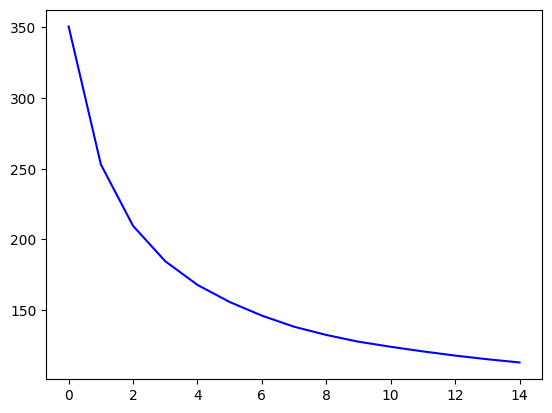

In [6]:
plt.plot(history.history['loss'],'b-')

In [7]:
def plot_images(nRow, nCol, img, cmap='gray'):
  fig = plt.figure()
  fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
  for i in range(nRow):
    for j in range(nCol):
      if nRow <=1: axis=ax[j]
      else: axis=ax[i,j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      axis.imshow(img[i*nCol+j], cmap=cmap)

<Figure size 640x480 with 0 Axes>

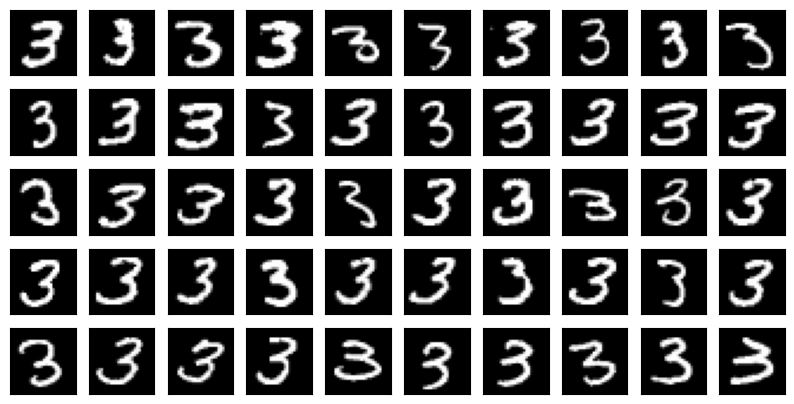

In [8]:
three_idx = y_train == 3
three_array = X_train[three_idx]

plot_images(5,10,three_array.reshape(-1,28,28))

192/192 [==============================] - 0s 2ms/step


<Figure size 640x480 with 0 Axes>

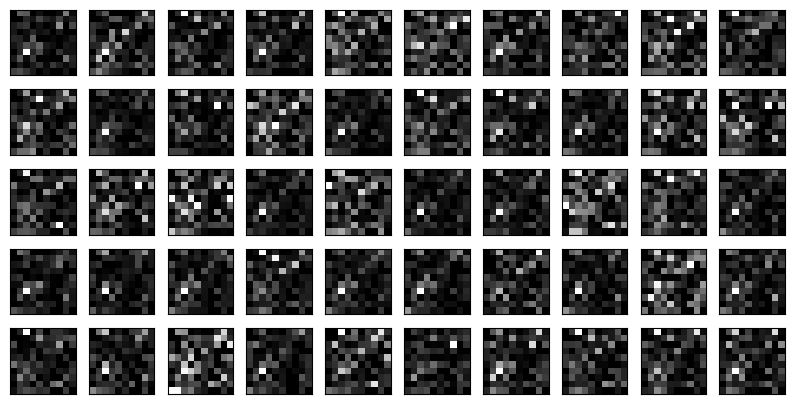

In [9]:
three_array = three_array.reshape(-1,28,28,1)

three_encoded = enc_cnn.predict(three_array)

plot_images(5, 10, three_encoded.reshape(-1,10,10))

# 12.5)

3과 4를 표현하는 데이터를 사용하여 오토인코더를 학습하고 이를 통해 3과 4를 표현하는 입력 데이터에 대한 잠재 표현을 구한다.
잠재 공간에서 3과 4의 중간 지점에 잠재 벡터를 생성하고, 이를 디코더에 입력으로 주어 새로운 이미지를 생성하면
3과 4 사이의 구분하기 힘든 특징을 가진 3인지 4인지 구분하기 힘든 데이터가 생성된다.

# 12.6)

오토인코더는 인코더를 통해 데이터를 압축하고 디코더를 통해 데이터를 복원하는 기능을 가지기에
고해상도와 저해상도간의 학습이 되어 있는 오토인코더 형태의 신경망이라면 어느정도의 해상도 높이는 문제는 해결할 수 있다.
다만, 이는 어느정도의 선이지 데이터를 완전 복원시키거나 초고해상도로 만들 수는 없다.

# 12.7)

오토인코더는 인코더를 통해 데이터를 압축하고 디코더를 통해 데이터를 복원하는 기능을 가지기에
이미지의 일부 영역의 색이 사라졌을 때 이에 대해 학습이 되어 있는 오토인코더가 있다면
일부 영역의 색이 사라진 이미지를 인코더에 입력으로 주어 잠재표현을 구하고 누락된 영역을 대표 잠재표현에서 가져와 채우고
다시 디코더에 입력으로 주어 recovery시키면 사라진 색을 복원할 수 있다.

# 12.8)

오토인코더를 통해 얻은 잠재 표현을 시각화하여 잠재 공간에서 데이터의 분포를 살펴보면
특정 경계에 인접해있거나 비슷한 패턴을 가지고 있다면 서로 구분하기 어렵다.

또는, 잠재 표현 간의 거리 또는 유사도를 측정했을 때 서로 다른 클래스의 잠재 표현 간의 거리가 가깝거나 유사도 높으면
서로 구분하기 힘든 클래스로 간주할 수 있다.